<a href="https://colab.research.google.com/github/piyuss/bag-detection/blob/main/Exclusion_bag_detection_demo_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train YOLOv5 for exclusion bag detection


In this notebook, we will experiment with a variation of the You Only Look Once (YOLO) object detection model to detect paper exclusion bags placed on loblolly pine trees. This notebook was designed as a part of a larger project on the development of a robotic controlled pollination system using an Unoccupied Aerial System (UAS). 

Before running this notebook, make sure that the Hardware Accelerator under Runtime type is set to GPU. You can use the Table of Contents on the left panel to follow the outline of the notebook and for easy navigation between different sections.

# 1 Setup

We begin by downloading the
[YOLOv5 Github repository](https://github.com/ultralytics/yolov5).

In [1]:
#@title 1.1 Download model
%%capture
!git clone https://github.com/ultralytics/yolov5.git
%cd /content/yolov5
!pip install -r requirements.txt

Next we download the images and labels to be used for demonstrating the YOLOv5 training and inference.

In [2]:
#@title 1.2 Download data

!git clone https://github.com/piyuss/bag-detection.git
!mv bag-detection/* .
!mv bag-detection/*.* .

Cloning into 'bag-detection'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 239 (delta 14), reused 221 (delta 5), pack-reused 0
Receiving objects: 100% (239/239), 33.82 MiB | 15.81 MiB/s, done.
Resolving deltas: 100% (14/14), done.
mv: cannot stat 'bag-detection/*.*': No such file or directory


At this point, we should have a folder called **custom_dataset** inside **yolov5**. **custom_dataset** contains **images** and **labels**. We will display one of the images from the folder **val** inside **images**.

# 2 Initial Tests

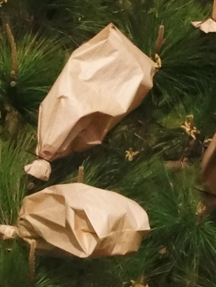

In [ ]:
#@title 2.1 Display example image

from IPython.display import Image
test_image_path = './custom_dataset/images/val/9.PNG'
Image(test_image_path)

What about the ground-truth labels on this image? We will define a new function `draw_boxes()` that will display the image along with the bounding box labels inside the **labels** folder.

In [ ]:
#@title 2.2 Function for displaying bounding box
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

def draw_yolo_bbox(img_path):
    """Draws bounding box(es) on an image using the YOLO format.

    Args:
        img_path: The path to image to draw on.
    """
    img = cv2.imread(img_path)
    label_path = os.path.join('./custom_dataset/labels', 
                          img_path.split('/')[-2],
                          os.path.splitext(os.path.basename(img_path))[0] +
                          '.txt')
    
    bbox = pd.read_csv(label_path, header=None)
    for i in range(len(bbox)):
        current_bbox = bbox.values[i][0].split(' ')[1:]
        current_bbox = [float(b) for b in current_bbox]
        x, y, w, h = current_bbox
        x1 = int((x - w / 2) * img.shape[1])
        y1 = int((y - h / 2) * img.shape[0])
        x2 = int((x + w / 2) * img.shape[1])
        y2 = int((y + h / 2) * img.shape[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img[:,:,::-1]

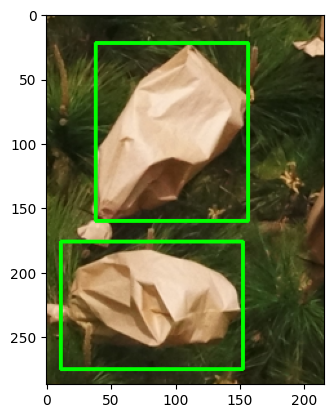

In [ ]:
#@title 2.3 Display example image with groundtruth boxes
plt.imshow(draw_yolo_bbox(test_image_path))

#  3 Inference with the off-the-shelf model

YOLOv5 comes pretrained on a large dataset known as
[Common Objects in COntext (COCO) dataset](https://cocodataset.org/#home). Therefore, this model can be used to detect several objects without any modification. Here, we will first download an image of a street scence from [Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/2_red_Bromptons_10Av_30_jeh.JPG/1024px-2_red_Bromptons_10Av_30_jeh.JPG) to test with the default model.

--2023-04-18 00:42:53--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/2_red_Bromptons_10Av_30_jeh.JPG/1024px-2_red_Bromptons_10Av_30_jeh.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287691 (281K) [image/jpeg]
Saving to: ‘1024px-2_red_Bromptons_10Av_30_jeh.JPG.1’

1024px-2_red_Brompt 100%[===================>] 280.95K  --.-KB/s    in 0.01s   

2023-04-18 00:42:54 (24.9 MB/s) - ‘1024px-2_red_Bromptons_10Av_30_jeh.JPG.1’ saved [287691/287691]



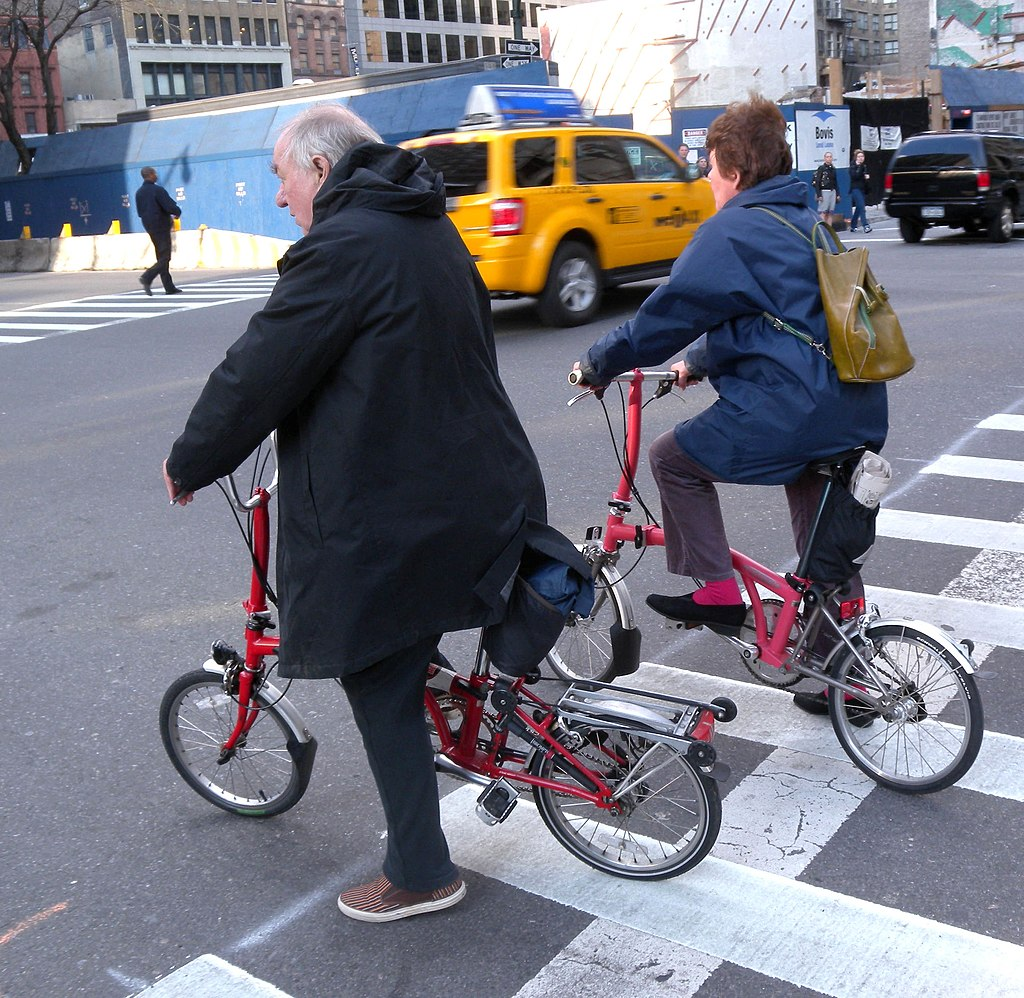

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/2_red_Bromptons_10Av_30_jeh.JPG/1024px-2_red_Bromptons_10Av_30_jeh.JPG
Image("1024px-2_red_Bromptons_10Av_30_jeh.JPG", width = 600)

In [ ]:
#@title 3.1 Inference with street scene image

!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source 1024px-2_red_Bromptons_10Av_30_jeh.JPG

detect: weights=['yolov5s.pt'], source=1024px-2_red_Bromptons_10Av_30_jeh.JPG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/1024px-2_red_Bromptons_10Av_30_jeh.JPG: 640x640 5 persons, 2 bicycles, 1 car, 1 truck, 1 traffic light, 1 handbag, 12.3ms
Speed: 0.6ms pre-process, 12.3ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


The script detect.py creates a new folder for every experiment, so the location of the file showing the detection result may be different each time. Based on where the result is saved, change the file path below to visualize the detection results.

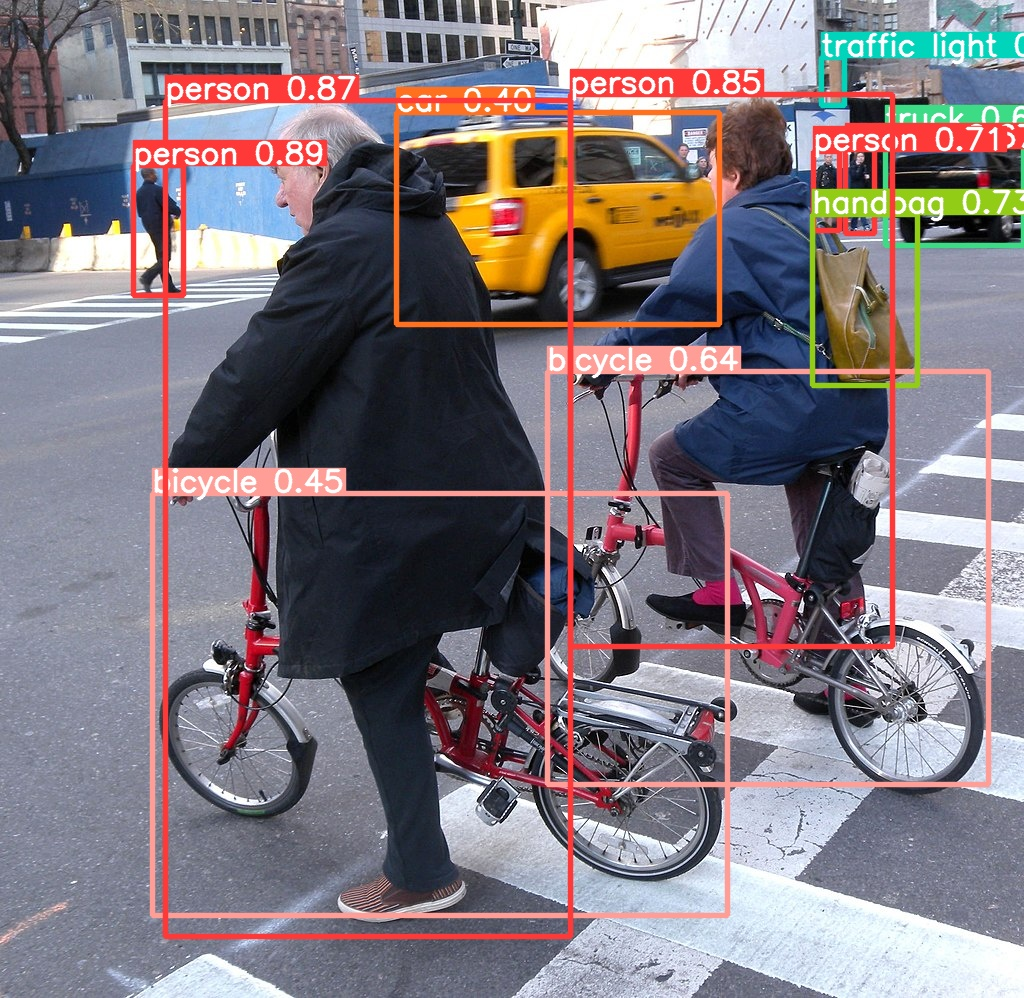

In [ ]:
#@title TO-DO: Change file path from result above
Image("runs/detect/exp/1024px-2_red_Bromptons_10Av_30_jeh.JPG", width = 600)

We can see that the model works well for multiple object classes at different scales. Can we use it to detect our bag images?

In [ ]:
#@title 3.2 Inference with example bag image
!python detect.py --weights yolov5s.pt --img 640 --conf 0.1 --source $test_image_path #custom_dataset/images/val/9.PNG

detect: weights=['yolov5s.pt'], source=./custom_dataset/images/val/9.PNG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/custom_dataset/images/val/9.PNG: 640x512 1 umbrella, 112.1ms
Speed: 0.6ms pre-process, 112.1ms inference, 2.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


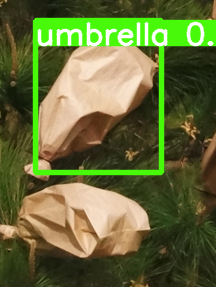

In [ ]:
Image(filename='runs/detect/exp2/9.PNG')

# 4 Fine-tuning


The YOLOv5 Github repository that we downloaded provides a useful script named `train.py` which we can use to fine-tune the model for detecting our paper bags. The script takes multiple arguments so that we can customize our training pipeline. You can find a complete list of the accepted arguments [here](https://github.com/ultralytics/yolov5/blob/94714fe6addff41e4984ff510f70cc415a131725/train.py#L435). 

The following arguments have been specified in the code cell below.

1. `data` This is the path to the yaml file with the information about the training data. 
2. `epochs` The number of epochs you want your training to run. We will run the initial training for 10 epochs.
3. `weights` The initial model weights to use before fine-tuning. Pass '' to train from scratch.
4. `freeze` The model layers to be frozen during training.

In [ ]:
!python train.py \
  --data ./custom_dataset.yaml \
  --epochs 10 \
  --weights yolov5s.pt \
  --freeze 10

train: weights=yolov5s.pt, cfg=, data=./custom_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0,

In [3]:
#@title 4.1Inference test with fine-tuned model

!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --save_txt --source custom_dataset/images/val/9.PNG

usage: detect.py
       [-h]
       [--weights WEIGHTS [WEIGHTS ...]]
       [--source SOURCE]
       [--data DATA]
       [--imgsz IMGSZ [IMGSZ ...]]
       [--conf-thres CONF_THRES]
       [--iou-thres IOU_THRES]
       [--max-det MAX_DET]
       [--device DEVICE]
       [--view-img]
       [--save-txt]
       [--save-conf]
       [--save-crop]
       [--nosave]
       [--classes CLASSES [CLASSES ...]]
       [--agnostic-nms]
       [--augment]
       [--visualize]
       [--update]
       [--project PROJECT]
       [--name NAME]
       [--exist-ok]
       [--line-thickness LINE_THICKNESS]
       [--hide-labels]
       [--hide-conf]
       [--half]
       [--dnn]
       [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: --save_txt


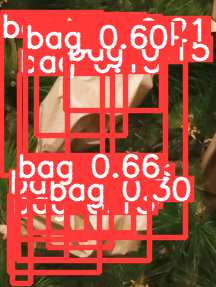

In [ ]:
Image('runs/detect/exp3/9.PNG')

The model now tries to detect a bag but the result with ten epochs of training is clearly not good enough. At this point, you have two options to make the model work better. You can go to the training code above and change the number of epochs to a higher number (50 epochs should be sufficient to train a reasonable bag detector in this case). Alternatively, a pre-trained model was downloaded into our working directory when we downloaded the images from github. In the next code cell, we use this model to run inference on the example image.

In [6]:
!python detect.py --weights ./best.pt --img 640 --conf 0.1 --save-txt --source custom_dataset/images/val/9.PNG

detect: weights=['./best.pt'], source=custom_dataset/images/val/9.PNG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/custom_dataset/images/val/9.PNG: 640x512 2 bags, 43.8ms
Speed: 0.6ms pre-process, 43.8ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2
1 labels saved to runs/detect/exp2/labels


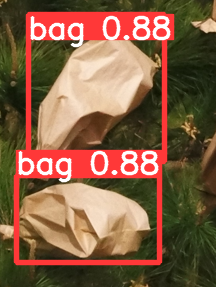

In [ ]:
Image('runs/detect/exp4/9.PNG')

In [ ]:
#@title Calcuate mAP

def iou_from_yolo_boxes(box1, box2):
    iou_value = 0
    return iou_value

def calculate_iou(label_file):
    iou1 = 0
    return iou